        gp    wx    wy    gh       wvl  nmeta        T1        T2    phase1  \
0     0.70  0.30  0.60   1.0  1.500000  1.552  1.206929  1.398488  0.532642   
1     0.70  0.30  0.60   1.0  1.442308  1.552  1.082670  1.225317  1.985573   
2     0.70  0.30  0.60   1.0  1.388889  1.552  1.011937  1.113180 -2.840876   
3     0.70  0.30  0.60   1.0  1.339286  1.552  0.956835  1.029413 -1.384738   
4     0.70  0.30  0.60   1.0  1.293103  1.552  0.901455  0.958254  0.061871   
...    ...   ...   ...   ...       ...    ...       ...       ...       ...   
5962  1.25  0.39  0.78  20.0  0.528169  1.552  0.085838  0.341500 -0.864962   
5963  1.25  0.39  0.78  20.0  0.520833  1.552  0.292042  0.428587 -2.504840   
5964  1.25  0.39  0.78  20.0  0.513699  1.552  0.555291  0.214731  2.915933   
5965  1.25  0.39  0.78  20.0  0.506757  1.552  0.299737  0.179567  2.022971   
5966  1.25  0.39  0.78  20.0  0.500000  1.552  0.159264  0.320006 -0.081933   

        phasen    phase2  phasediff  
0    -2.60895

C:\Users\Asus\AppData\Local\Temp\ipykernel_13180\1549128138.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
C:\Users\Asus\AppData\Local\Temp\ipykernel_13180\1549128138.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.float32)
C:\Users\Asus\AppData\Local\Temp\ipykernel_13180\1549128138.py:109: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_test[i:i+batch_size], dtype=torch.float32)


Epoch [0/7150], Loss: 0.3233, Val Loss: 0.2896
Epoch [100/7150], Loss: 0.1237, Val Loss: 0.1225
Epoch [200/7150], Loss: 0.1160, Val Loss: 0.1218
Epoch [300/7150], Loss: 0.1099, Val Loss: 0.1261
Epoch [400/7150], Loss: 0.1060, Val Loss: 0.1198
Epoch [500/7150], Loss: 0.1028, Val Loss: 0.1154
Epoch [600/7150], Loss: 0.0994, Val Loss: 0.1149
Epoch [700/7150], Loss: 0.0954, Val Loss: 0.1128
Epoch [800/7150], Loss: 0.0919, Val Loss: 0.1157
Epoch [900/7150], Loss: 0.0895, Val Loss: 0.1099
Epoch [1000/7150], Loss: 0.0876, Val Loss: 0.1103
Epoch [1100/7150], Loss: 0.0857, Val Loss: 0.1081
Epoch [1200/7150], Loss: 0.0823, Val Loss: 0.1136
Epoch [1300/7150], Loss: 0.0811, Val Loss: 0.1044
Epoch [1400/7150], Loss: 0.0792, Val Loss: 0.1073
Epoch [1500/7150], Loss: 0.0773, Val Loss: 0.1095
Epoch [1600/7150], Loss: 0.0749, Val Loss: 0.0986
Epoch [1700/7150], Loss: 0.0753, Val Loss: 0.1066
Epoch [1800/7150], Loss: 0.0739, Val Loss: 0.1082
Epoch [1900/7150], Loss: 0.0708, Val Loss: 0.1038
Epoch [2000/

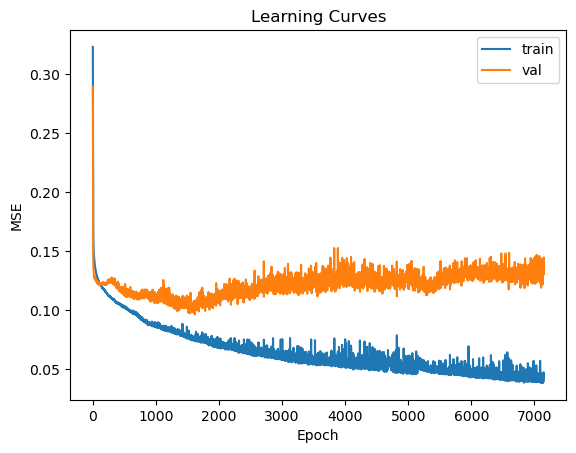

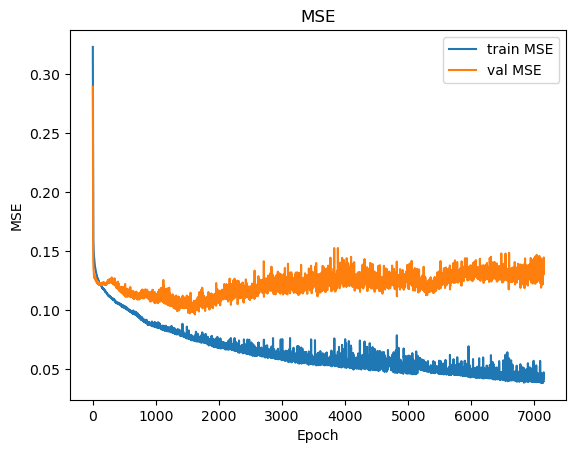

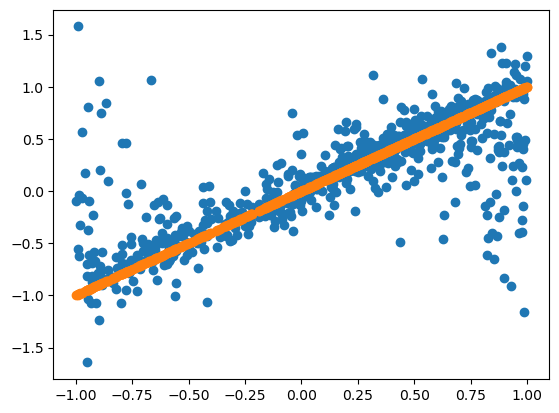

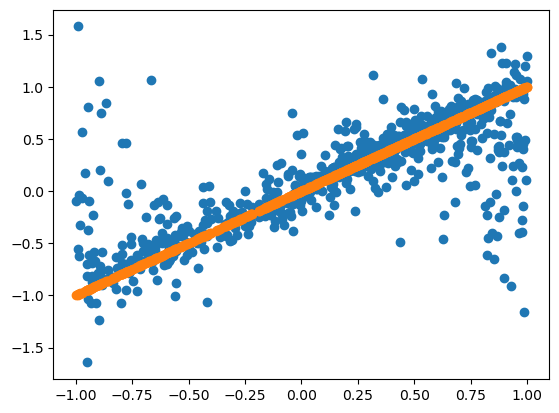

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: X has 10 features, but MinMaxScaler is expecting 12 features as input.

In [1]:
##1 Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

###2 Reading the data file  

dfm = pd.read_pickle('data_metasurface-low_index') 
print (dfm)

##3 Data pre-processing and scalling

# Scale the input data in the range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(dfm)
df_scaler = scaler.transform(dfm)
print(df_scaler) 

##4a Data Splitting 

X, y = df_scaler[:, 0:6], df_scaler[:, 11:12]
from sklearn.utils import shuffle
X, y = shuffle(X, y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.13)

##4b Convert data to PyTorch tensors

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32) 
y_test = torch.tensor(y_test, dtype=torch.float32)
# Determine the number of input features and output dimensions
n_features = X_train.shape[1]
n_outputs = y.shape[1]
print(X, y)
print(n_features)
print(n_outputs )

##5a Defining the model 

class MyModel(nn.Module):
    def __init__(self, n_features, n_outputs):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(n_features, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 50)
        self.fc4 = nn.Linear(50, n_outputs)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

#5b Create the model
model = MyModel(n_features, n_outputs)

##6 model compilation  

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
# Define the learning rate scheduler
#lr_scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[500, 1000], gamma=0.1) 

##7 Model Training 

num_epochs = 7150
batch_size = 42
train_losses = []
val_losses = []

for epoch in range(num_epochs):

    # Training
    model.train()
    total_loss = 0.0
    num_batches = 0

    for i in range(0, len(X_train), batch_size):
        inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
        targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.float32)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        num_batches += 1

    avg_train_loss = total_loss / num_batches
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    with torch.no_grad():
        total_val_loss = 0.0
        num_val_batches = 0

        for i in range(0, len(X_test), batch_size):
            inputs = torch.tensor(X_test[i:i+batch_size], dtype=torch.float32)
            targets = torch.tensor(y_test[i:i+batch_size], dtype=torch.float32)
            outputs = model(inputs)
            val_loss = criterion(outputs, targets)
            total_val_loss += val_loss.item()
            num_val_batches += 1

        # Calculate average validation loss for the epoch and append to val_losses
        avg_val_loss = total_val_loss / num_val_batches
        val_losses.append(avg_val_loss)

    # Update the learning rate using the scheduler at the end of each epoch
    #lr_scheduler.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

# Save the model
torch.save(model.state_dict(), 'saved_model/my_model.pt')

##8 Evaluate the model on the test dataset
with torch.no_grad():
    model.eval()
    yhat_test = model(X_test)
    test_loss = criterion(yhat_test, y_test)
print('MSE Loss on Test Dataset:', test_loss.item())


##9 all curves
#learning curve
plt.figure()
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.savefig('MLoss1.png')
plt.show()

# Plot MSE curve
plt.figure()
plt.title('MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(train_losses, label='train MSE')
plt.plot(val_losses, label='val MSE')
plt.legend()
plt.show()

##10 Make prediction on row


# Make predictions on the test dataset
with torch.no_grad():
    yhat_test = model(X_test)

# Calculate y_pred (equivalent to yhat_test)
y_pred = yhat_test

# Create a new figure for the first scatter plot
plt.figure()
idx = 0
plt.scatter(y_test[:, idx], y_pred[:, idx])  # Plot specific column from y_test vs. corresponding prediction
plt.scatter(y_test[:, idx], y_test[:, idx])  # Plot specific column from y_test vs. itself
plt.savefig('MLData2.png')                  # Save the scatter plot as 'MLData2.png'
plt.show()                                 # Display the scatter plot

# Create a new figure for the second scatter plot
plt.figure()
plt.scatter(y_test[:, -1], y_pred[:, -1])   # Plot last column from y_test vs. last column from predictions
plt.scatter(y_test[:, -1], y_test[:, -1])   # Plot last column from y_test vs. itself
plt.savefig('MLDataphse1.png')              # Save the scatter plot as 'MLDataphse1.png'
plt.show()                         

# Make a prediction on a new input data point



row = [1.25, 0.390, 0.780, 11, 1.5, 1.552]  # Assuming 6 input features
user_input = np.append(row, np.zeros((1, 4))).reshape(1, -1)
user_input = scaler.transform(user_input)
user_input = torch.tensor(user_input, dtype=torch.float32)

# Set model to evaluation mode for prediction (Not needed if already set before)
# model.eval()

# Make prediction for the user_input
with torch.no_grad():
    yhat = model(user_input)
    final = torch.cat((user_input[:, 0:n_features], yhat), dim=1)

# Convert the prediction back to original scale using inverse_transform
yha = scaler.inverse_transform(final)
print('Predicted: %s' % yha[:, 6:10])

# Calculate the phase using the predicted values
phase = yha[:, -2] + np.pi - yha[:, -1]

#---------------------------